In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [42]:
df = pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [43]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [44]:
# Getting information regarding the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [45]:
# Checking if there is any empty row in particular or not
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


Before Preprocessing

In [46]:
cols_before = ['zn','chas','dis','rad','b','lstat','rm','indus','ptratio','tax','nox','crim','age']

In [47]:
X_train_before,X_test_before,y_train_before,y_test_before = train_test_split(df[cols_before],df['medv'],test_size = 0.2,random_state = 42)

In [48]:
from sklearn.linear_model import LinearRegression
LinearRegBeforePre = LinearRegression()
LinearRegBeforePre.fit(X_train_before,y_train_before)
y_pred_lr_before = LinearRegBeforePre.predict(X_test_before)
print("r2 score is", r2_score(y_test_before,y_pred_lr_before))
print("Mean square error is" , mean_squared_error(y_test_before,y_pred_lr_before))
print("Root mean sqaure error is", np.sqrt(mean_squared_error(y_test_before,LinearRegBeforePre.predict(X_test_before))))
print("Mean absolute error is", mean_absolute_error(y_test_before,y_pred_lr_before))

r2 score is 0.6687594935356307
Mean square error is 24.291119474973616
Root mean sqaure error is 4.9286021826653466
Mean absolute error is 3.1890919658878563


In [49]:
print("Intercept : ", LinearRegBeforePre.intercept_)
print("Slope : ", LinearRegBeforePre.coef_)

Intercept :  30.246750993924135
Slope :  [ 3.01104641e-02  2.78443820e+00 -1.44786537e+00  2.62429736e-01
  1.23513347e-02 -5.08571424e-01  4.43883520e+00  4.03807204e-02
 -9.15456240e-01 -1.06467863e-02 -1.72026334e+01 -1.13055924e-01
 -6.29636221e-03]


Preprocessing of Data

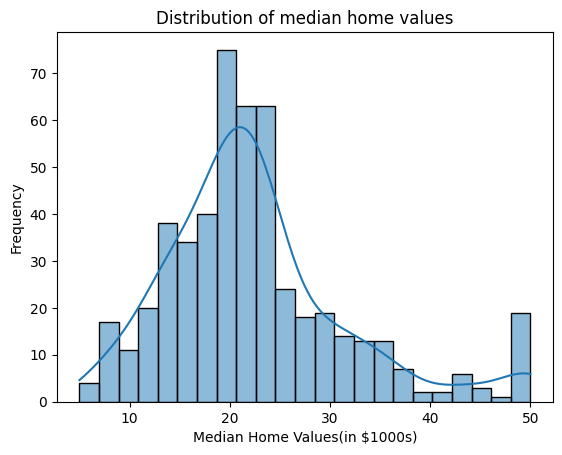

In [50]:
sns.histplot(df['medv'],kde=True)
plt.title('Distribution of median home values')
plt.xlabel('Median Home Values(in $1000s)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

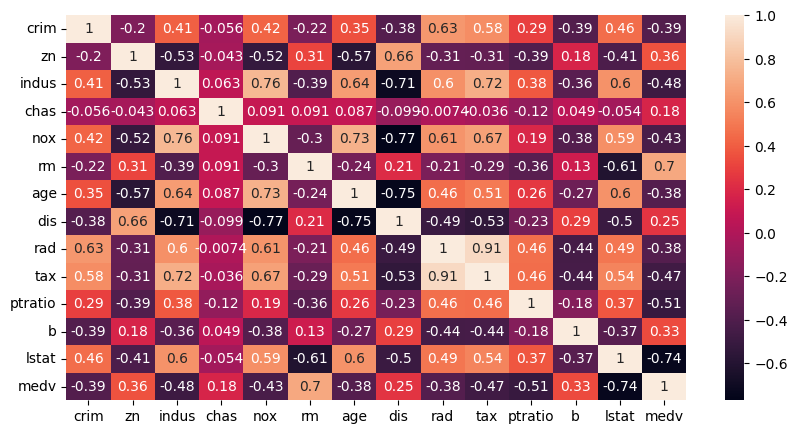

In [51]:
# Correlation Matric for Feature Selection
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [52]:
print(df.corr()['medv'].sort_values(ascending=False))

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


WE CAN SEE THAT COLUMNS TAX AND RAD ARE HIGHLY CORRELATED, HENCE ANY ONE OF THEM CAN BE DISCARDED.

WE CAN THEN TRAIN THE MODEL ON FEATURES THAT HAVE A ABS(CORRELATION) OF GREATER THAN LETS SAY 0.4

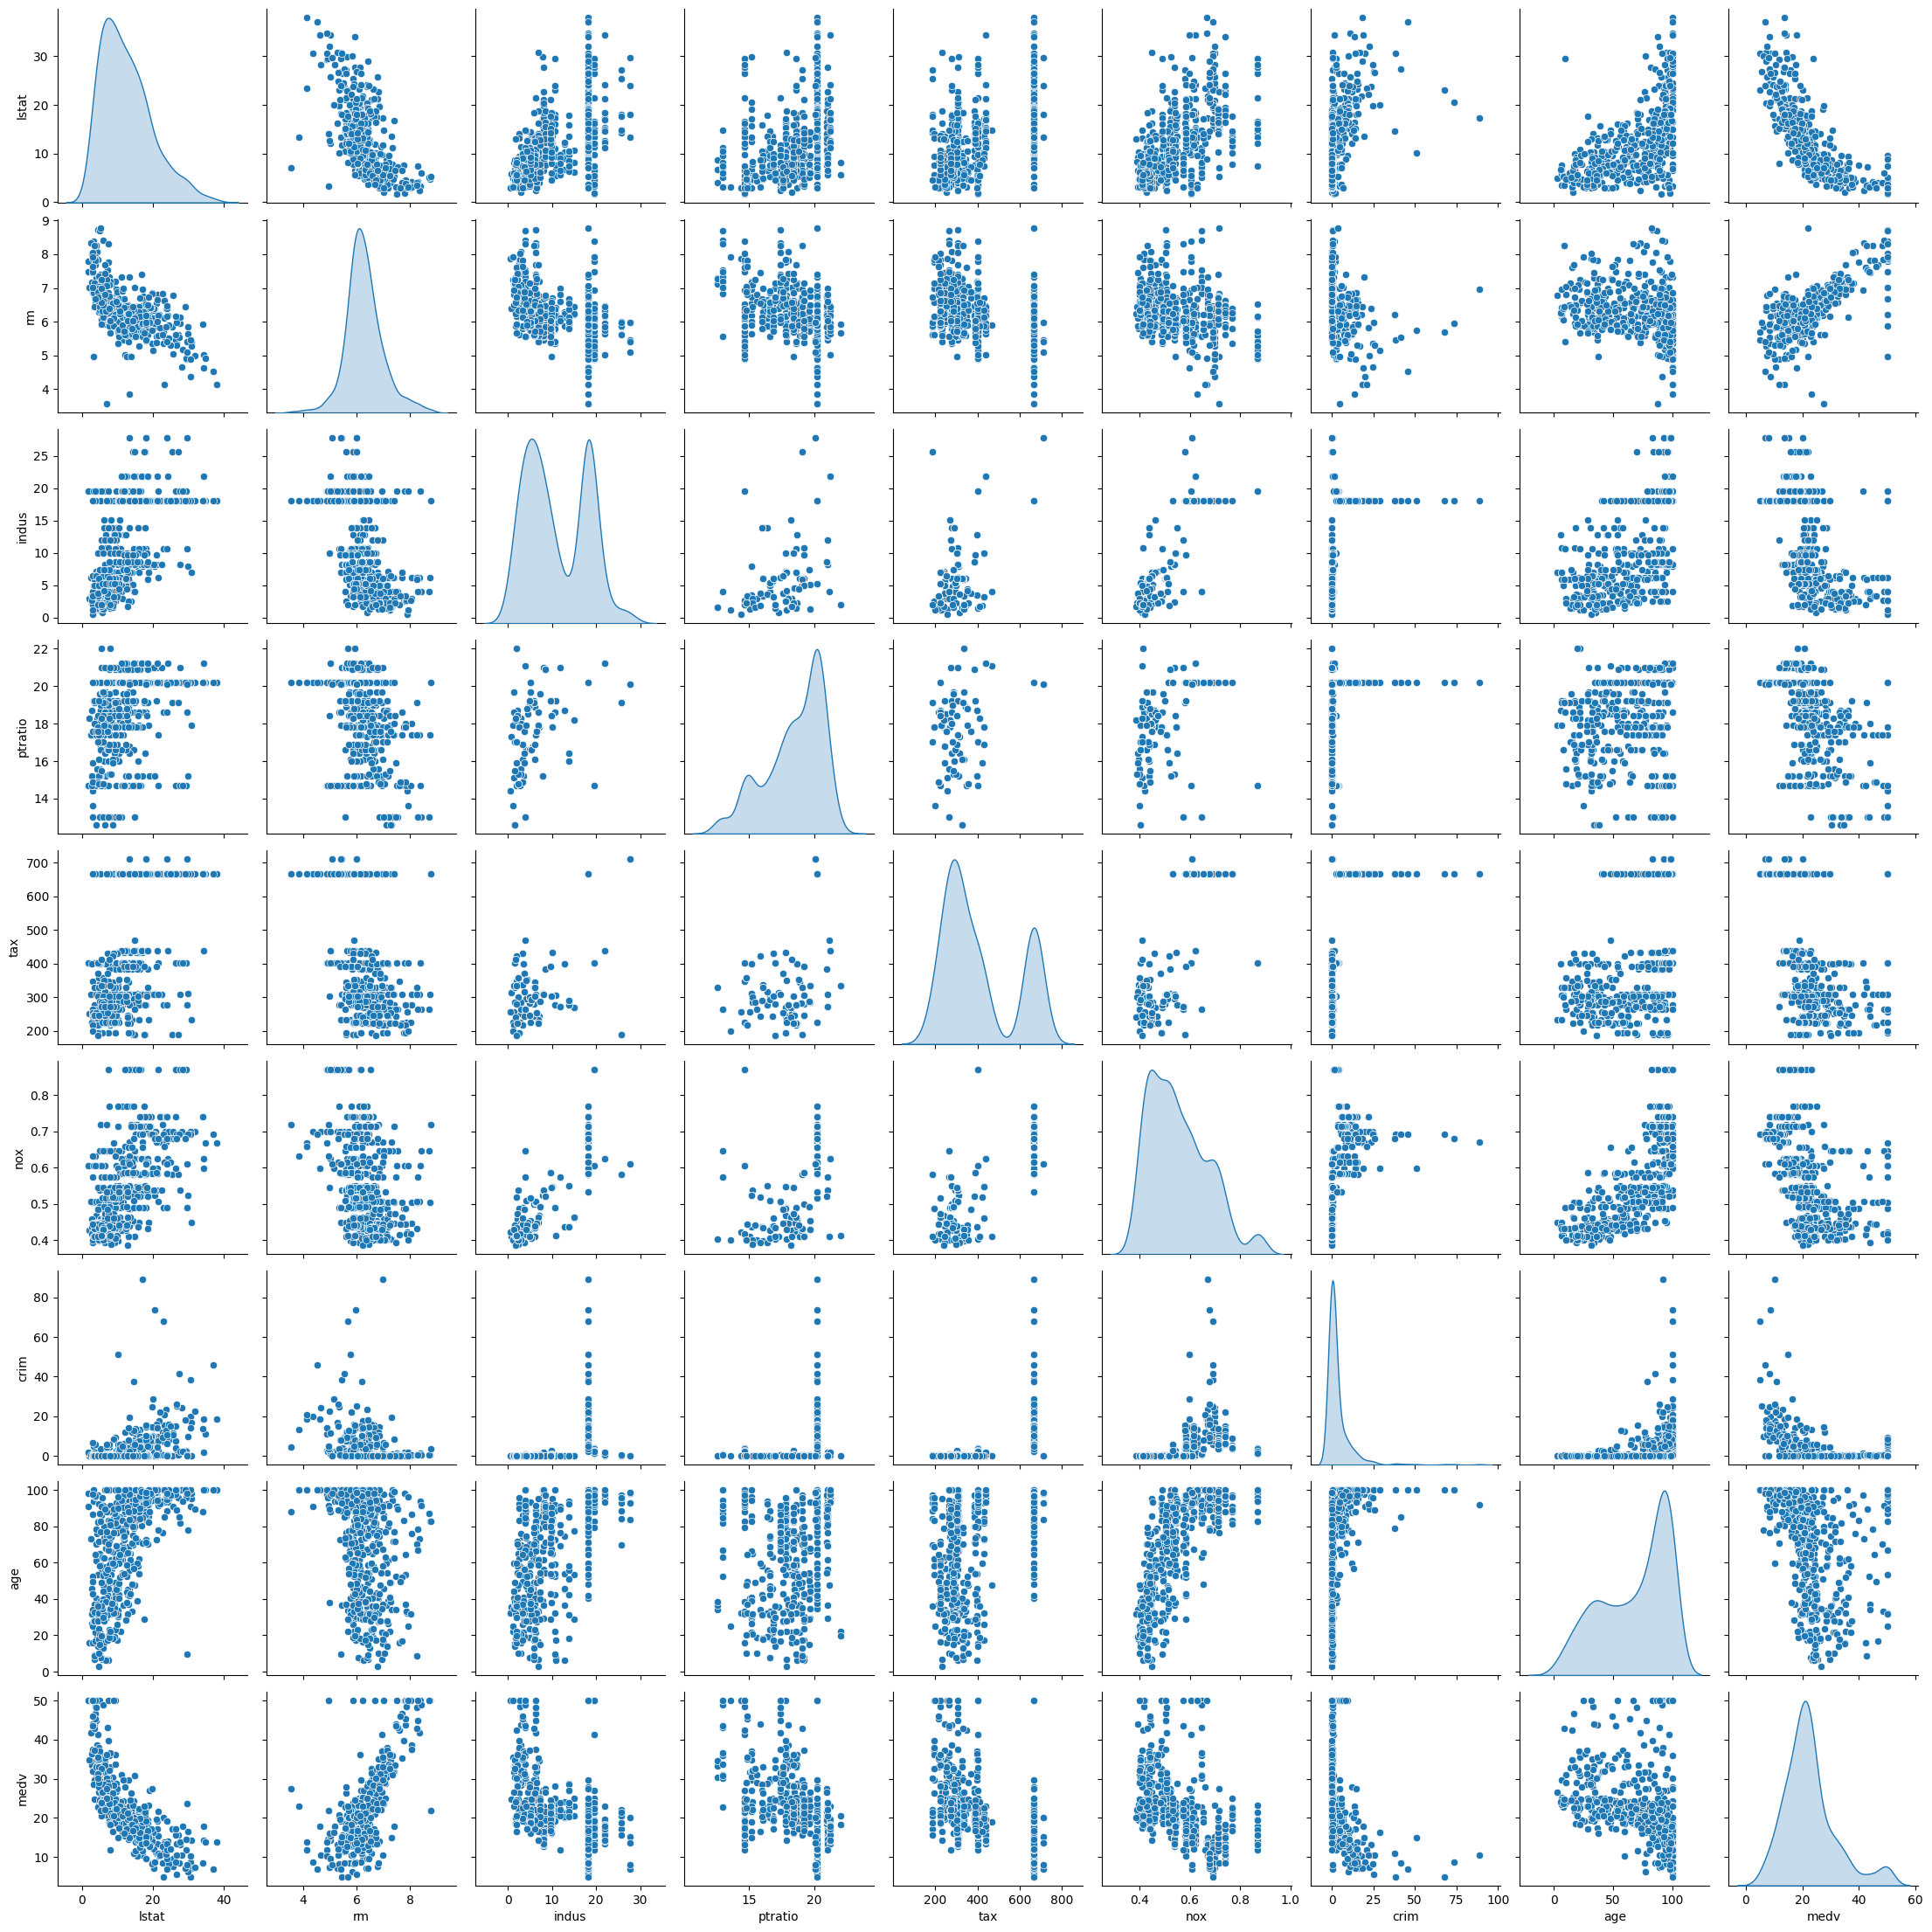

In [53]:
sns.pairplot(df,vars=['lstat','rm','indus','ptratio','tax','nox','crim','age','medv'],diag_kind = 'kde')
plt.show()

In [54]:
cols_after = ['lstat','rm','indus','ptratio','tax','nox','crim','age']
df[cols_after]

,lstat,rm,indus,ptratio,tax,nox,crim,age
0,4.98,6.575,2.31,15.3,296,0.538,0.00632,65.2
1,9.14,6.421,7.07,17.8,242,0.469,0.02731,78.9
2,4.03,7.185,7.07,17.8,242,0.469,0.02729,61.1
3,2.94,6.998,2.18,18.7,222,0.458,0.03237,45.8
4,5.33,7.147,2.18,18.7,222,0.458,0.06905,54.2
...,...,...,...,...,...,...,...,...
501,9.67,6.593,11.93,21.0,273,0.573,0.06263,69.1
502,9.08,6.120,11.93,21.0,273,0.573,0.04527,76.7
503,5.64,6.976,11.93,21.0,273,0.573,0.06076,91.0
504,6.48,6.794,11.93,21.0,273,0.573,0.10959,89.3


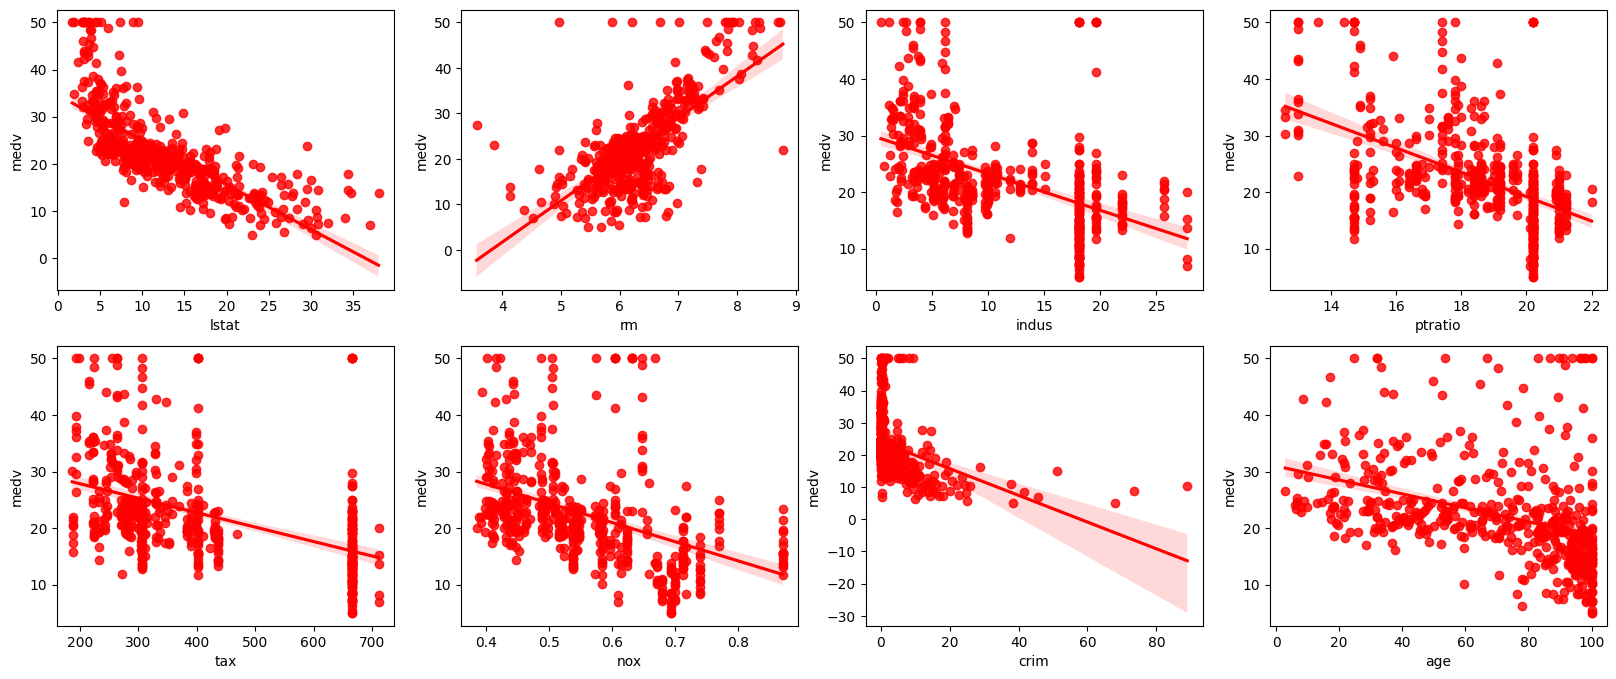

In [55]:
# Plots for analysing relationship among features
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,8))
for col,ax in zip(cols_after,axs.flat):
    sns.regplot(x=df[col],y=df['medv'],color = 'red',ax=ax)

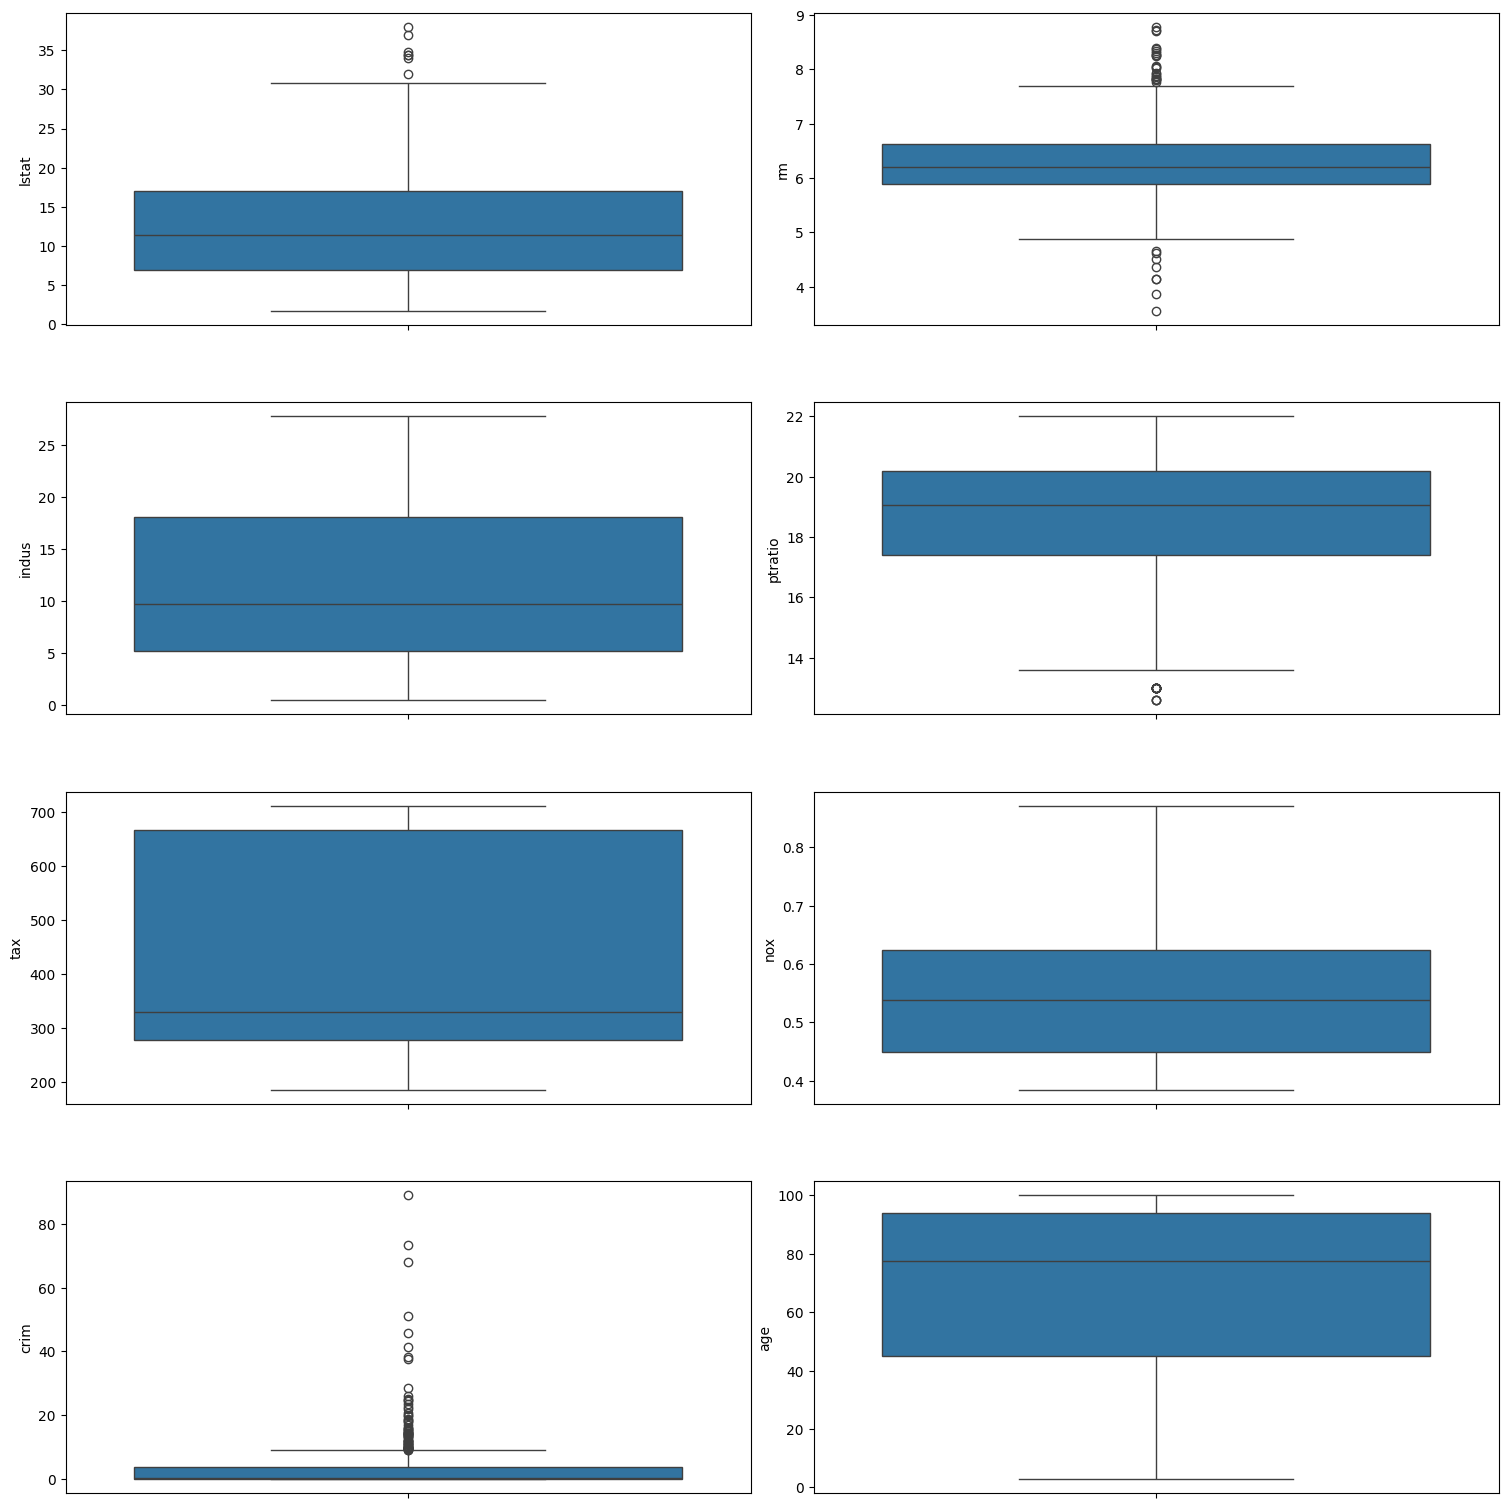

In [56]:
# Box-plots for visualizing outliers
figs,axs = plt.subplots(nrows=4,ncols=2,figsize=(15,15))
index = 0
axs = axs.flatten()
for k,v in df[cols_after].items():
  sns.boxplot(y=k,data=df[cols_after],ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

In [57]:
df=df[~((df['rm']>=8.5)|(df['rm']<4))]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    int64  
 9   tax      501 non-null    int64  
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


In [59]:
X_train,X_test,y_train,y_test = train_test_split(df[cols_after],df['medv'],test_size = 0.2,random_state = 42)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LinearRegression
LinearRegAfterPre = LinearRegression()
LinearRegAfterPre.fit(X_train,y_train)
y_pred_lr_after = LinearRegAfterPre.predict(X_test)

After Preprocessing

In [62]:
y_pred_lr_after = LinearRegAfterPre.predict(X_test)
print("r2 score is", r2_score(y_test,y_pred_lr_after))
print("Mean square error is" , mean_squared_error(y_test,y_pred_lr_after))
print("Root mean sqaure error is", np.sqrt(mean_squared_error(y_test,LinearRegAfterPre.predict(X_test))))
print("Mean absolute error is", mean_absolute_error(y_test,y_pred_lr_after))

r2 score is 0.7112024810340087
Mean square error is 20.65048626960436
Root mean sqaure error is 4.544280610790267
Mean absolute error is 3.428432393896027


In [63]:
print("Intercept : ", LinearRegAfterPre.intercept_)
print("Slope : ", LinearRegAfterPre.coef_)

Intercept :  22.758249999999993
Slope :  [-3.74638869  3.66372274  0.82770195 -1.85994578 -0.25141401 -0.63983714
 -0.49112679  0.46351378]
